In [ ]:
# https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/adding_C4/C4/W4/ungraded_labs/C4_W4_Lab_3_DNN_only.ipynb#scrollTo=13XrorC5wQoE


In [ ]:
import tensorflow as tf
print(tf.__version__)

import os
import random as rn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

os.environ['PYTHONHASHSEED'] = '0'
os.environ['CUDA_VISIBLE_DEVICES'] = ''

np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

2021-09-26 20:14:48.920678: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-26 20:14:48.920723: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2.4.1


In [ ]:

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

# https://stackoverflow.com/questions/30399534/shift-elements-in-a-numpy-array/30401705#30401705
def shift2(arr,num):
    arr=np.roll(arr,num)
    if num<0:
         np.put(arr,range(len(arr)+num,len(arr)),np.nan)
    elif num > 0:
         np.put(arr,range(num),np.nan)
    return arr

In [ ]:
df_cm = pd.read_csv('btc_cm_metrics_final.csv')

df_cm = df_cm[df_cm['PriceUSD'].notna()]
df_cm = df_cm.reset_index(drop=True)
#df_cm.index = pd.to_datetime(df_cm.date)
df_cm = df_cm.drop('date', 1)
df_cm

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
0,860.0,49287.0,52093.0,52190.0,199.0,51245.0,52190.0,54.0,51064.0,52190.0,...,396.0,17180.550000,1.474778e+03,48.783737,4.187596,1.850000,0.158804,1.820565,NaN,NaN
1,929.0,49297.0,52208.0,52311.0,207.0,51276.0,52311.0,54.0,51085.0,52311.0,...,512.0,40243.730000,3.251693e+03,86.951152,7.025653,2.625000,0.212100,1.828863,NaN,NaN
2,936.0,49367.0,52344.0,52456.0,213.0,51353.0,52456.0,54.0,51157.0,52456.0,...,738.0,16063.230000,1.200497e+03,42.528835,3.178423,1.375000,0.102762,1.831412,NaN,NaN
3,784.0,49382.0,52397.0,52521.0,220.0,51380.0,52521.0,54.0,51179.0,52521.0,...,377.0,20834.150000,1.649916e+03,71.822334,5.687816,18.500000,1.465068,1.833749,NaN,NaN
4,594.0,49504.0,52577.0,52715.0,222.0,51508.0,52715.0,57.0,51304.0,52715.0,...,344.0,33049.030000,1.932369e+03,112.714622,6.590397,1.010000,0.059054,1.840245,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,943981.0,9336.0,2246927.0,15899233.0,1065.0,471724.0,6797743.0,44.0,99326.0,38417526.0,...,784062.0,263865.756580,1.245810e+10,0.799209,37733.696252,0.003150,148.725340,13.201068,0.040265,0.033389
4080,819880.0,9338.0,2247669.0,15911798.0,1063.0,471889.0,6802337.0,44.0,99364.0,38416290.0,...,670401.0,166864.001496,8.043515e+09,0.610503,29428.696581,0.002580,124.366355,13.203984,0.040105,0.032926
4081,714326.0,9336.0,2248051.0,15932651.0,1063.0,472008.0,6804772.0,44.0,99370.0,38437441.0,...,589280.0,94508.875166,4.462565e+09,0.460092,21724.829251,0.002390,112.847903,13.206157,0.040132,0.031576
4082,1014971.0,9323.0,2249147.0,15916017.0,1063.0,471974.0,6807912.0,44.0,99365.0,38355678.0,...,776709.0,431154.750752,1.847736e+10,1.667030,71441.404401,0.003521,150.888252,13.203028,0.040680,0.036079


In [ ]:
time_index_split = int(np.round((len(df_cm)*.90)))                 # index of where to split train/test, 90%
time_index_split

3676

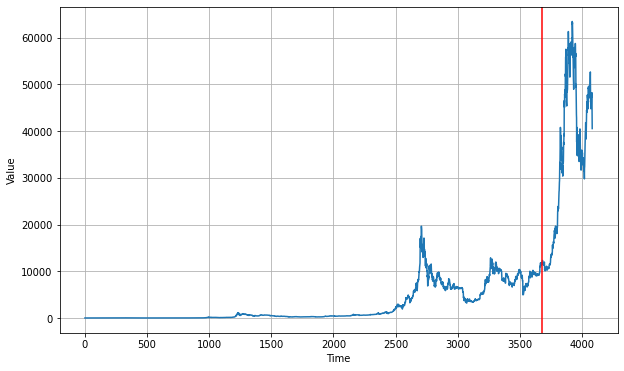

In [ ]:

price_series = np.array(df_cm['PriceUSD'])
time_index_series = np.array(df_cm.index)

plt.figure(figsize=(10, 6))
plot_series(time_index_series, price_series)
plt.axvline(x=time_index_split, color='r', label='axvline - full height')



In [ ]:
#time_index_split = 3750                 # index of where to split train/test
time_train = time_index_series[:time_index_split]    # 
price_train = price_series[:time_index_split]
time_test = time_index_series[time_index_split:]
price_test = price_series[time_index_split:]

# window, batch, shuff, lr, epochs, mae
# 80, 200, 700, 1e-10, 100, 2658.229
# 80, 200, 1000, 1e-10, 100, 2249.0
# 60, 200, 1000, 1e-10, 100, 2196.6887
# 50, 200, 1000, 1e-10, 100, 1954.4086
# 40, 200, 1000, 1e-10, 100, 1907.042
# 30, 200, 1000, 1e-10, 100, 2234.8728

# 40, 200, 1500, 1e-10, 100, 1916.3392
# 40, 200, 900, 1e-10, 100, 2171.6875
# 40, 200, 1100, 1e-10, 100, 1952.641

# 40, 250, 1000, 1e-10, 100, 9979.537
# 40, 100, 1000, 1e-10, 100, 1743.6237
# 40, 80, 1000, 1e-10, 100, 1566.0966
# 40, 60, 1000, 1e-10, 100, 1559.5983
# 40, 30, 1000, 1e-10, 100, 1584.3143

# 40, 50, 1000, 1e-10, 100, 1494.6829 ** 1655.6729, 1798.231, 1509.8649
# 40, 40, 1000, 1e-10, 100, 1675.0016

# 40, 55, 1000, 1e-10, 100, 1699.6995

# 40, 50, 1000, 2e-10, 100, 1610.3257
# 40, 50, 1000, 3e-10, 100, 1374.5299 ****
# 40, 50, 1000, 4e-10, 100, 1714.0444

# 2nd layer:
# 60, 1428.4601, 1425.0819
# 70, 1537.3285
# 40, 1444.577
# 50, 1696.2174, 1517.4219, 1467.785, 1434.8826
# 65, 1458.0967

# 50 2nd, 200 epochs, random seed 42 set
# 40, 50, 1000, 3e-10, 200, 1410.8774 **
# 40, 50, 2000, 3e-10, 200, 1725.5352
# 40, 50, 700, 3e-10, 200, 1462.0631
# 40, 50, 1100, 3e-10, 200, 1496.3527
# 40, 50, 100, 3e-10, 200, 2101.5652
# 40, 50, 900, 3e-10, 200, 1507.1869


window_size = 40 # 40
batch_size =  50 # 
shuffle_buffer_size = 1000

2021-09-26 20:15:02.040984: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-26 20:15:02.041289: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-09-26 20:15:02.041317: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-26 20:15:02.041408: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-465bb6a2-b771-4fe2-b2d2-aed723f7eb7d): /proc/driver/nvidia/version does not exist
2021-09-26 20:15:02.041830: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operatio

1030.0814543647814

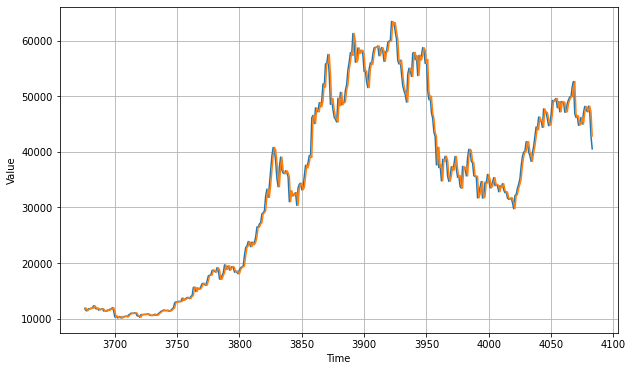

In [ ]:
days_ahead_to_predict = 1
naive_pred = price_series[time_index_split-days_ahead_to_predict:-days_ahead_to_predict]

plt.figure(figsize=(10, 6))
plot_series(time_test, price_test)
plot_series(time_test, naive_pred)

tf.keras.metrics.mean_absolute_error(naive_pred, price_test).numpy()

In [ ]:
# # https://stackoverflow.com/questions/55429307/how-to-use-windows-created-by-the-dataset-window-method-in-tensorflow-2-0

def make_windowed_training_set(series, window_size, batch_size, shuffle_buffer, days_ahead_to_predict):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  
  new_window_size = window_size + days_ahead_to_predict

  dataset = dataset.window(new_window_size, shift=1, drop_remainder=True)

  dataset = dataset.flat_map(lambda window: window.batch(new_window_size))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-days_ahead_to_predict], window[-1:]))
  dataset = dataset.batch(batch_size).prefetch(1)
  
  return dataset

dataset = make_windowed_training_set(price_train, window_size, batch_size, shuffle_buffer_size, days_ahead_to_predict)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-12 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-12, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])

2021-09-26 20:15:03.356382: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-26 20:15:03.377008: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499995000 Hz
Epoch 1/100
73/73 [==============================] - 5s 39ms/step - loss: 667.9312 - mae: 668.3975
Epoch 2/100
73/73 [==============================] - 5s 66ms/step - loss: 642.1175 - mae: 642.5866
Epoch 3/100
73/73 [==============================] - 7s 77ms/step - loss: 650.7765 - mae: 651.2456
Epoch 4/100
73/73 [==============================] - 5s 67ms/step - loss: 640.2461 - mae: 640.7143
Epoch 5/100
73/73 [==============================] - 4s 46ms/step - loss: 658.4466 - mae: 658.9140
Epoch 6/100
73/73 [==============================] - 6s 70ms/step - loss: 654.2519 - mae: 654.7202
Epoch 7/100
73/73 [==============================] - 5s 55ms/step - loss: 661.5541 - mae: 662.0199
Epoch 8/100
73/73 [================

(5.655877543841433e-13,
 1.5757960424855714e-07,
 83.50715789794921,
 1943.3453506469727)

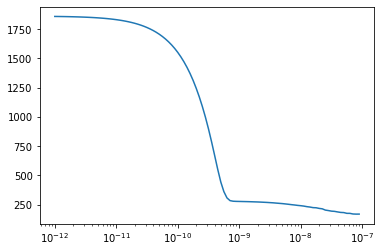

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis() # [1e-8, 1e-6, 0, 3000]

In [ ]:




model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=8e-10, momentum=0.9)) # was 3e-10
model.fit(dataset,epochs=200,verbose=0)


1168.2238

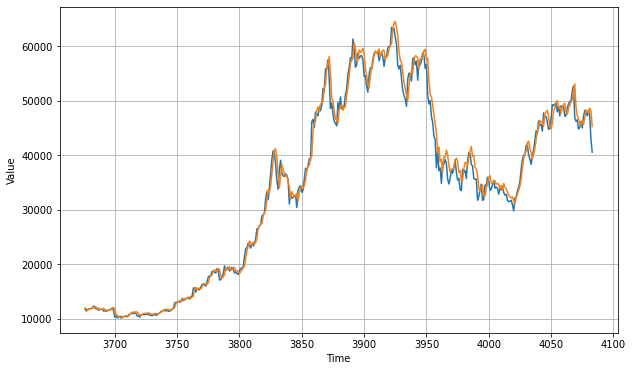

In [ ]:
forecast=[]
for time in range(len(price_series) - window_size):
  forecast.append(model.predict(price_series[time:time + window_size][np.newaxis]))

forecast = forecast[time_index_split-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_test, price_test)
plot_series(time_test, results)

tf.keras.metrics.mean_absolute_error(price_test, results).numpy()

# first: 1272.0206, 
# 1233.9647 - with 2 50 layers, lr: 3e-10
# 1530.4454 -  bad params, 1 50 layer, lr: 3e-10
# 1958.0427 - with 2 50 layers, lr: 1e-9
# 1334.721 - with 2 50 layers, lr: 1e-10
# 1388.0386 - with 2 50 layers, lr: 1e-11
# 1236.3889 - with 2 50 layers, lr: 5e-10
# 1210.836 - with 2 50 layers, lr: 7e-10 
# - with 2 50 layers, lr: 9e-10
#  - with 2 50 layers, lr: 8e-10
#  - with 2 50 layers, lr: 6e-10

# overfitting - low bias, high varaince

In [ ]:
fore=[]

serN = price_series[time_index_split-window_size:time_index_split] # last N(windows size) values from before the split

num_after_split = len(price_series) - time_index_split

for i in range(num_after_split):
    pred = model.predict(serN[np.newaxis])
    serN = np.append(serN[1:], [pred[0][0]])
    fore.append(pred)
    
print(fore)

[array([[11784.217]], dtype=float32), array([[11796.8955]], dtype=float32), array([[11842.414]], dtype=float32), array([[11916.396]], dtype=float32), array([[11999.919]], dtype=float32), array([[12076.241]], dtype=float32), array([[12191.005]], dtype=float32), array([[12224.103]], dtype=float32), array([[12260.357]], dtype=float32), array([[12259.641]], dtype=float32), array([[12259.519]], dtype=float32), array([[12343.824]], dtype=float32), array([[12281.783]], dtype=float32), array([[12344.973]], dtype=float32), array([[12363.559]], dtype=float32), array([[12481.89]], dtype=float32), array([[12537.956]], dtype=float32), array([[12555.467]], dtype=float32), array([[12601.015]], dtype=float32), array([[12670.975]], dtype=float32), array([[12769.176]], dtype=float32), array([[12792.684]], dtype=float32), array([[12869.228]], dtype=float32), array([[12986.108]], dtype=float32), array([[13173.98]], dtype=float32), array([[13268.594]], dtype=float32), array([[13391.745]], dtype=float32), a

30579.895

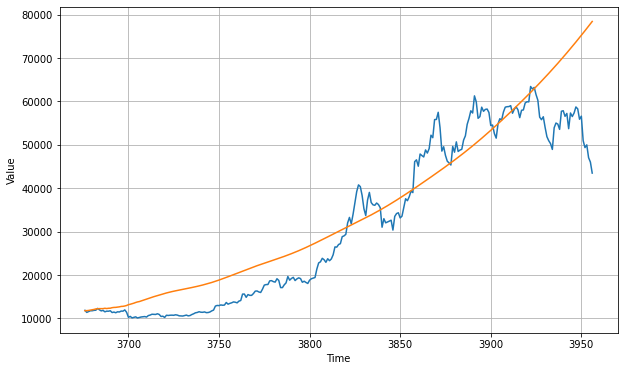

In [ ]:
# Attempt to use only new predicted values in the 40 day time window, instead of actual values.

results = np.array(fore)[:, 0, 0]

plt.figure(figsize=(10, 6))

days_to_show = 281

plot_series(time_test[:days_to_show], price_test[:days_to_show])
plot_series(time_test[:days_to_show], results[:days_to_show])

tf.keras.metrics.mean_absolute_error(price_test, results).numpy()

In [ ]:
l = [1,2,3,4,5]
l[2]

3

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=465bb6a2-b771-4fe2-b2d2-aed723f7eb7d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>